Homework1:
Use classification technique on the Breast Cancer dataset.
Data: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Description: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names
Specifically, build a decision tree, logistic regression and k-nearest neighbors that predicts the diagnose result based on ten real-valued features (mean, standard error, and "worst" or largest of these features). Explore how well different model perform for several different parameter values. When is overfitting and when is underfitting? Show how you set the model that provides the best predictive performance.
Present a brief overview of your predictive modeling process, explorations, and discuss your results. Make sure you present information about the model “goodness” (possible things to think about: confusion matrix, predictive accuracy, classification error, precision, recall, f-measure).

In [1]:
# This script illustrates the usage of Decision Trees. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load the data set
# load_breast_cancer() loads and returns the breast_cancer dataset (classification).
breast_cancer = load_breast_cancer()
# load_breast_cancer() returns a dictionary-like object. The interesting attributes are: 
# ‘data’, the data to learn, 
# ‘target’, the classification labels, 
# ‘target_names’, the meaning of the labels, 
# ‘feature_names’, the meaning of the features, and 
# ‘DESCR’, the full description of the dataset.

# details for this data set: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
## Explore the data set
n_samples, n_features = breast_cancer.data.shape
#print(breast_cancer.keys())
print ('The dimensions of the data set are', n_samples, 'by', n_features)
# It is made of 569 observations , each described by 30 features: radius, texture, perimenter, area, as detailed in breast_cancer.DESCR.

#print(breast_cancer.data.shape)
#print(breast_cancer.target.shape)
print('The classes are: ', breast_cancer.target_names)
print('The features in the data set are:', breast_cancer.feature_names)

# This data sets consists of 2 different types of cancer (malignant and benign) radius, texture, perimenter, area, stored
# in a 569x30 numpy.ndarray
# The rows being the samples and the columns being: the 30 fields described.

The dimensions of the data set are 569 by 30
The classes are:  ['malignant' 'benign']
The features in the data set are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


There are 0 missing values

Count of Malignant tumors 212
Count of Benign tumors 357


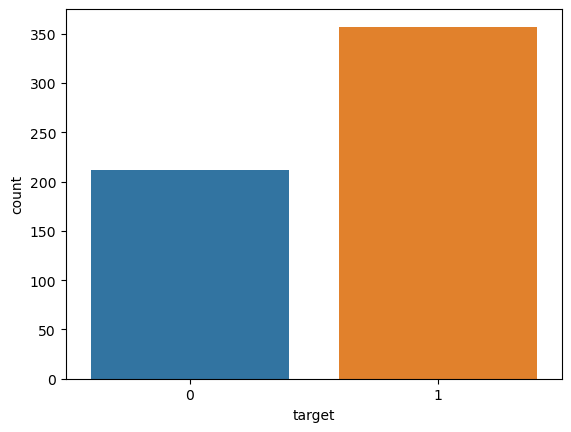

In [4]:
## Visualization of the data set
from mpl_toolkits.mplot3d import Axes3D

#X = breast_cancer.data
#y = breast_cancer.target

X,y = load_breast_cancer(return_X_y=True, as_frame=True)
print(f'There are {pd.concat([X,y], axis=1).isnull().sum().sum()} missing values')
print()
print(f'Count of Malignant tumors {y.value_counts()[0]}')
print(f'Count of Benign tumors {y.value_counts()[1]}')

ax = sns.countplot(x=y, label='Count')
plt.show()

Data Preparation in Decision Tree
Data preparation aims to prepare the data for the machine learning model. We will remove correlated features and split the dataset for training and testing to build a tree-based model.

We can use a heatmap to visualize the correlation values

Use the heatmap method to display correlation values from the corr() function of the pandas data frame.

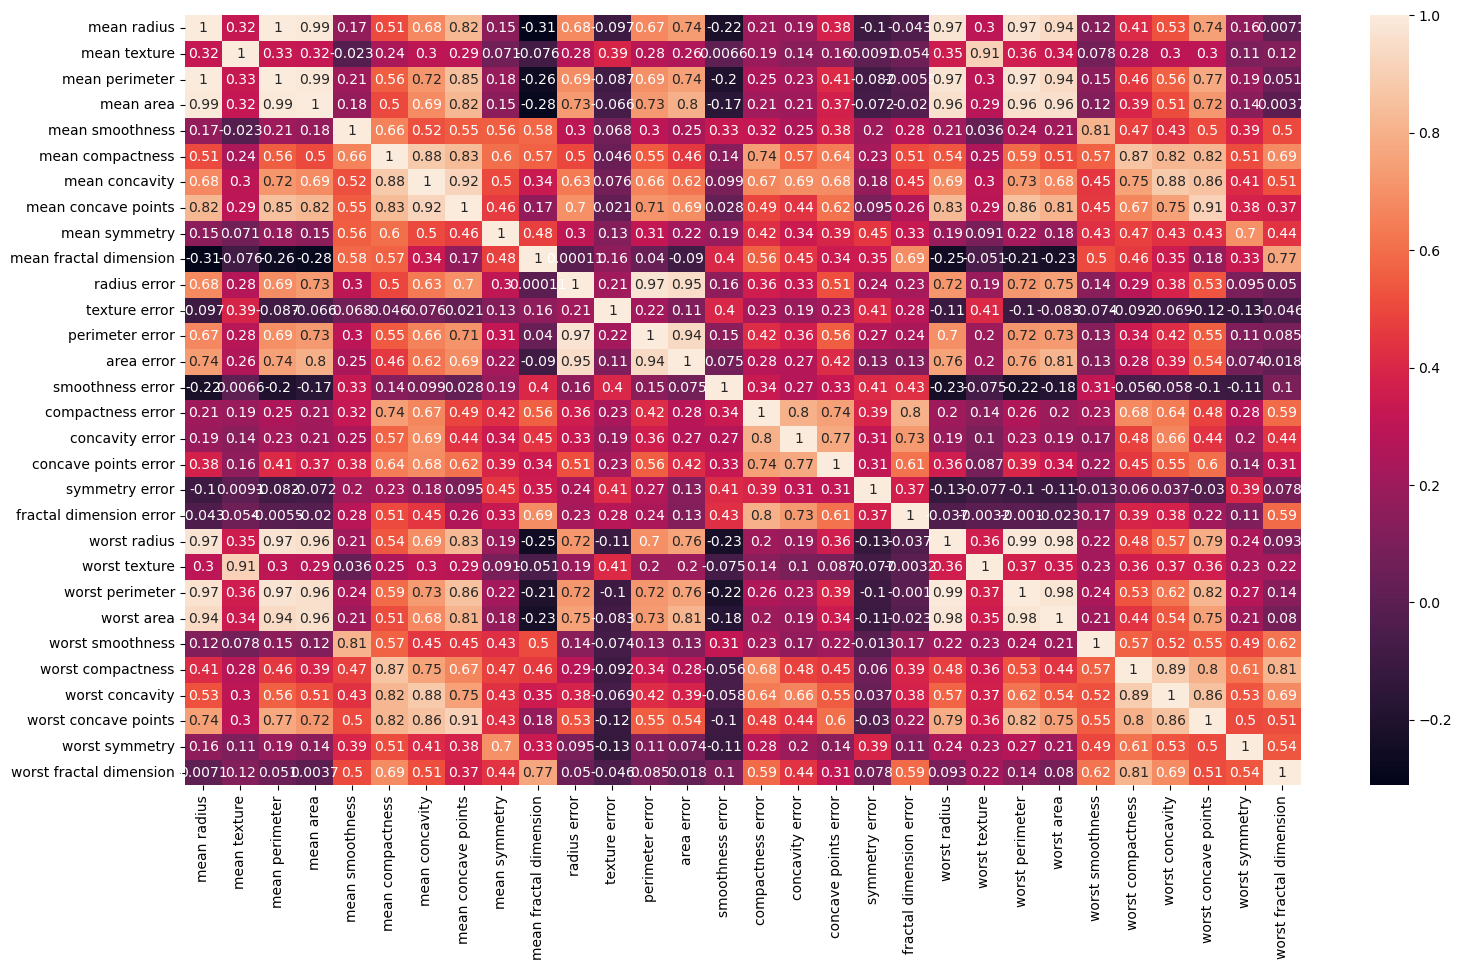

In [5]:
plt.figure(figsize=(18,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

Utilize the drop method to eliminate variables that exhibit high correlation. The rationale for this action is to mitigate the issue of multicollinearity, which can render the regression coefficients for highly interdependent variables unreliable in your predictive model.

In addition to this, performance and storage constraints also justify the removal of such correlated variables. Ultimately, the importance of a feature boils down to its contribution to predictive accuracy and the sufficiency of its data quality

In [6]:
# Generate correlation matrix
corr_matrix = X.corr()

# Create an empty set to store the names of correlated features
features_to_remove = set()

# Loop to check for highly correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  # Choose a threshold, e.g., 0.8
            colname = corr_matrix.columns[i]
            features_to_remove.add(colname)

# Convert set to list
features_to_remove = list(features_to_remove)

# Print features to remove
print("Features to remove:", features_to_remove)
print("Number of features to remove:", len(features_to_remove))

Features to remove: ['mean concavity', 'worst smoothness', 'worst texture', 'worst compactness', 'worst concave points', 'mean area', 'worst perimeter', 'fractal dimension error', 'worst concavity', 'concavity error', 'worst fractal dimension', 'perimeter error', 'area error', 'mean perimeter', 'worst radius', 'mean concave points', 'worst area']
Number of features to remove: 17


In [7]:
drop_list = ['worst compactness', 'mean area', 'mean concave points', 'fractal dimension error', 'concavity error', 'perimeter error', 'area error', 'worst area', 'worst concave points', 'worst radius', 'worst smoothness', 'worst concavity', 'worst perimeter', 'mean concavity', 'mean perimeter', 'worst fractal dimension', 'worst texture']
X = X.drop(drop_list, axis=1)

In [8]:
X.head()

mean radius  mean texture  mean smoothness  mean compactness  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   mean symmetry  mean fractal dimension  radius error  texture error  \
0         0.2419                 0.07871        1.0950         0.9053   
1         0.1812                 0.05667        0.5435         0.7339   
2         0.2069                 0.05999        0.7456         0.7869   
3         0.2597                 0.09744        0.4956         1.1560   
4         0.1809                 0.05883        0.7572         0.7813   

   smoothness error  compactness error  concave points error  symmetry error  \
0          0.006399            0.04904               0.01587         0.03003   
1          0.005225            0.01308               0.01340         0.01389   
2          0.006150            0.04006               0.02058         0.02250   
3          0.009110            0.07458               0.01867         0.05963   
4          0.011490            0.02461               0.01885         0.01756   

   worst symmetry  
0          0.4601  
1          0.2750  
2          0.3613  
3          0.6638  
4          0.2364

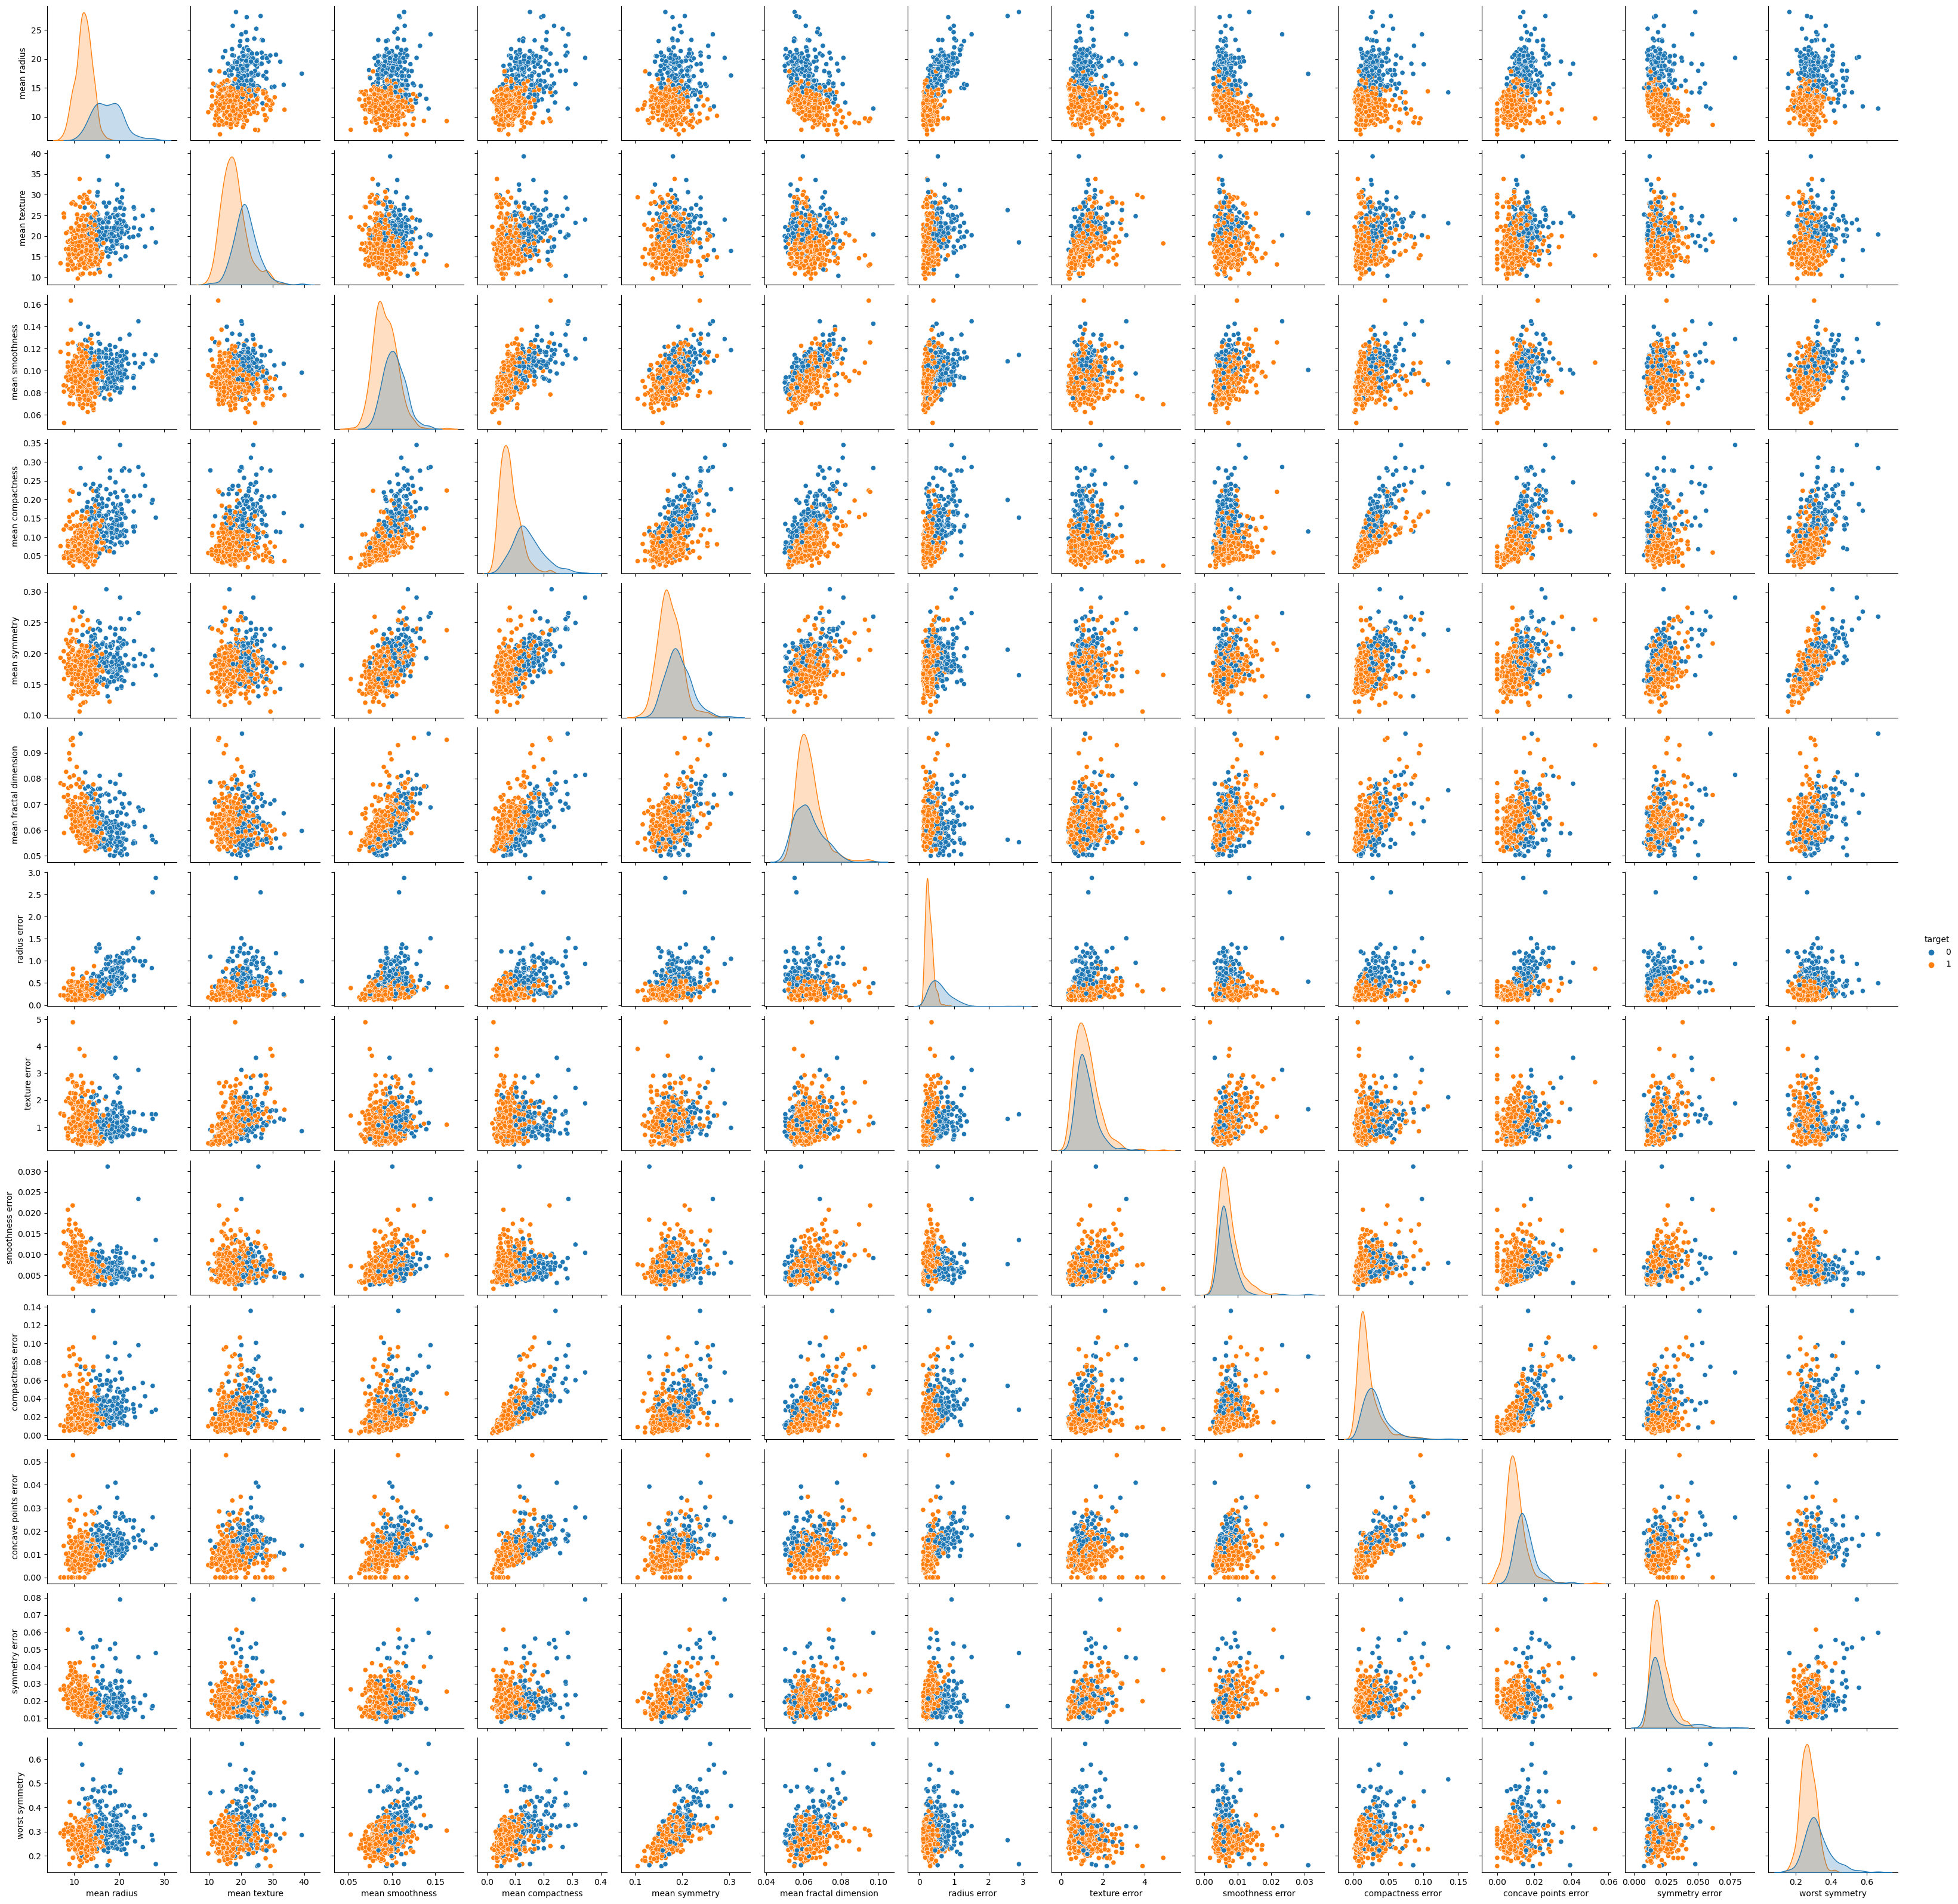

In [9]:
# Assuming 'y' is the target variable and it's a pandas Series
df_with_target = pd.concat([X, y.rename('target')], axis=1)

# Plot only remaining features against the target
sns.pairplot(df_with_target, hue='target', vars=[col for col in X.columns])
plt.show()


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Decision Tree

In [22]:
# Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
# The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.# We create an instance of the Classifier

# We start with initializing our classifier. 
clf = tree.DecisionTreeClassifier()

# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

# We call our estimator instance clf, as it is a classifier. 
# It now must be fitted to the model, that is, it must learn from the model. 
# This is done by passing our training set to the fit method. 

[Text(0.59375, 0.9444444444444444, 'X[0] <= 15.025\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.40808823529411764, 0.8333333333333334, 'X[12] <= 0.357\ngini = 0.238\nsamples = 319\nvalue = [44, 275]'),
 Text(0.25735294117647056, 0.7222222222222222, 'X[1] <= 19.61\ngini = 0.144\nsamples = 294\nvalue = [23, 271]'),
 Text(0.11764705882352941, 0.6111111111111112, 'X[6] <= 0.596\ngini = 0.029\nsamples = 203\nvalue = [3, 200]'),
 Text(0.058823529411764705, 0.5, 'X[2] <= 0.133\ngini = 0.01\nsamples = 200\nvalue = [1, 199]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 198\nvalue = [0, 198]'),
 Text(0.08823529411764706, 0.3888888888888889, 'X[11] <= 0.02\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.058823529411764705, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11764705882352941, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17647058823529413, 0.5, 'X[10] <= 0.04\ngini = 0.444\nsamples = 3\nv

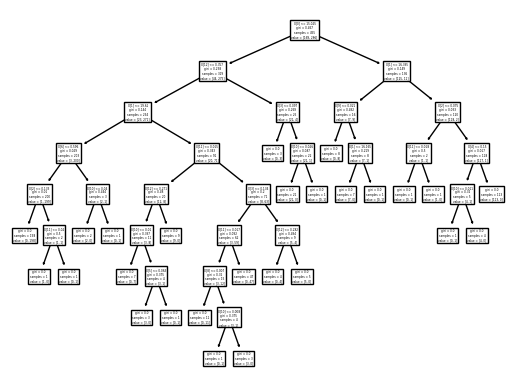

In [23]:
## Train the model (fit the data)
# 'fit' builds a decision tree from the training set (X, y).
clf = clf.fit(X_train, y_train)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: 
# an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and 
# an array Y of integer values, size [n_samples], holding the class labels for the training samples:
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
tree.plot_tree(clf)
# Now you can predict new values

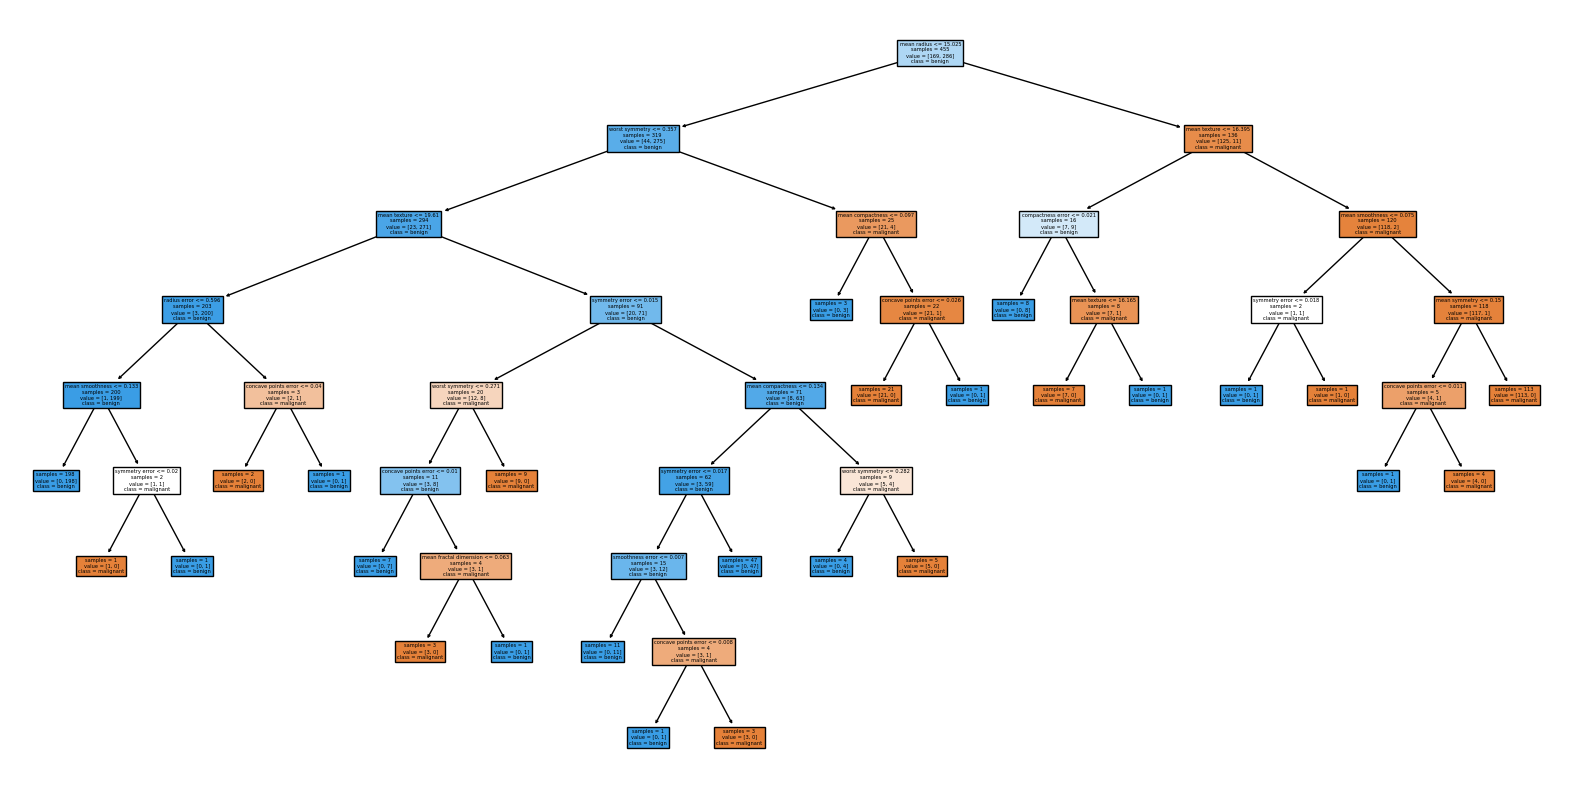

In [24]:
#Baseline tree without no hyperparameters
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=breast_cancer.target_names,
          filled=True, impurity=False)
plt.show()

Confusion Matrix:
[[39  4]
 [10 61]]

Predictive Accuracy: 87.72%

Classification Error: 12.28%

Classification Report (Precision, Recall, F-measure):
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        43
           1       0.94      0.86      0.90        71

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



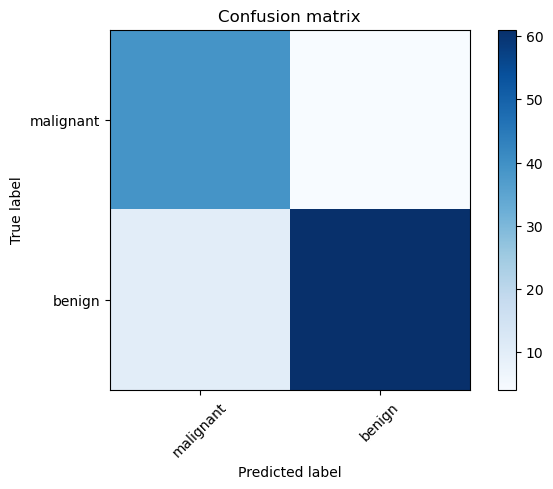

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(breast_cancer.target_names))
    plt.xticks(tick_marks, breast_cancer.target_names, rotation=45)
    plt.yticks(tick_marks, breast_cancer.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Predict labels for test data
y_pred = clf.predict(X_test)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure()
plot_confusion_matrix(conf_matrix)

# Calculate and display the predictive accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPredictive Accuracy: {accuracy*100:.2f}%")

# Calculate and display classification error
classification_error = 1 - accuracy
print(f"\nClassification Error: {classification_error*100:.2f}%")

# Calculate and display precision, recall, and f-measure
print("\nClassification Report (Precision, Recall, F-measure):")
print(classification_report(y_test, y_pred))

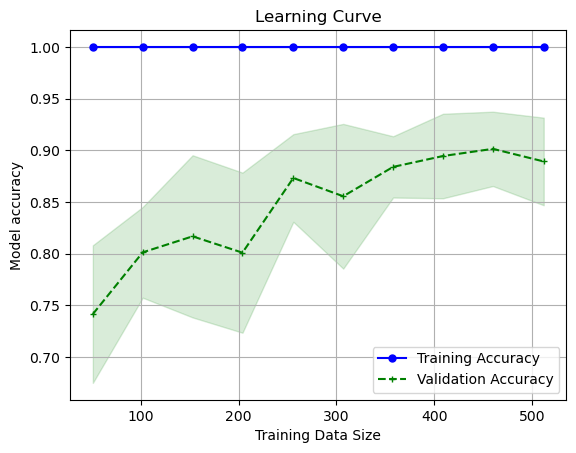

In [42]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(clf, X, y)

The training score is consistently high (close to 1.0) and the cross-validation score is significantly lower but increasing as the number of samples increases, this is indicative of overfitting.

Overfitting: The model has learned the training data too well, including its noise and outliers, but is not generalizing well to new, unseen data. This is indicated by the high training score and the gap between the training and cross-validation scores.

The baseline model has used all the features and is too complex which explains the overfitting

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, learning_curve

#Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Run GridSearch with Cross-Validation
#clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Find Best Parameters and Best Model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

cross_val_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-validation Scores: {cross_val_scores}")
print(f"Mean Accuracy: {cross_val_scores.mean()*100:.2f}%")
print(f"Standard Deviation: {cross_val_scores.std()*100:.2f}%")

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Cross-validation Scores: [0.87719298 0.86842105 0.92105263 0.95614035 0.92920354]
Mean Accuracy: 91.04%
Standard Deviation: 3.29%


Confusion Matrix:
[[38  5]
 [ 4 67]]

Predictive Accuracy: 92.11%

Classification Error: 7.89%

Classification Report (Precision, Recall, F-measure):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



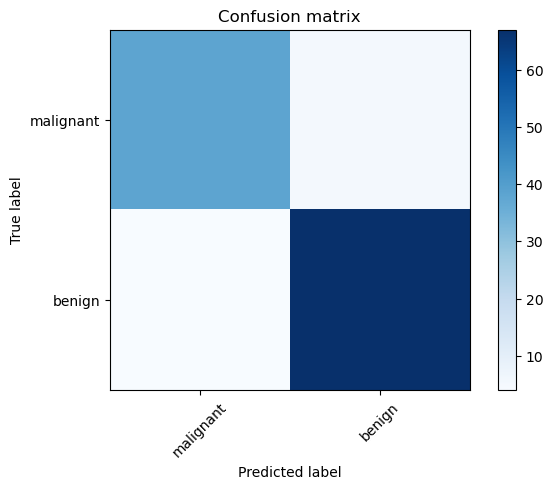

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(breast_cancer.target_names))
    plt.xticks(tick_marks, breast_cancer.target_names, rotation=45)
    plt.yticks(tick_marks, breast_cancer.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Predict labels for test data
y_pred = best_model.predict(X_test)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure()
plot_confusion_matrix(conf_matrix)

# Calculate and display the predictive accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPredictive Accuracy: {accuracy*100:.2f}%")

# Calculate and display classification error
classification_error = 1 - accuracy
print(f"\nClassification Error: {classification_error*100:.2f}%")

# Calculate and display precision, recall, and f-measure
print("\nClassification Report (Precision, Recall, F-measure):")
print(classification_report(y_test, y_pred))

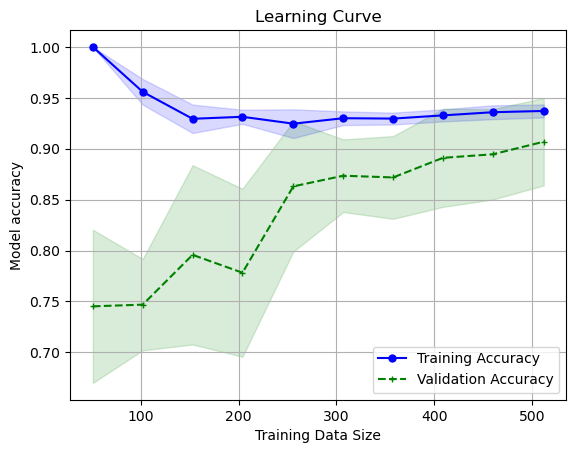

In [43]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(best_model, X, y)

For training sample size less than 250, the difference between training and validation accuracy is much larger. This is the case of overfitting
For training size greater than 250, the model is better. It is a sign of good bias-variance trade-off

Note that the training score and the cross-validation score are both very good at the end >0.9. 

However, the shape of the curve can be found in more complex datasets very often: 
the training score is very high at the beginning and decreases and the cross-validation score is very low at the beginning and increases.

We can see clearly that the training score has reduced and the validation score has increased with more training samples.

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [81]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [83]:
# Make predictions on the test data
y_pred = logistic_model.predict(X_test_scaled)

Confusion Matrix:
[[40  3]
 [ 2 69]]

Predictive Accuracy: 95.61%

Classification Error: 4.39%

Classification Report (Precision, Recall, F-measure):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



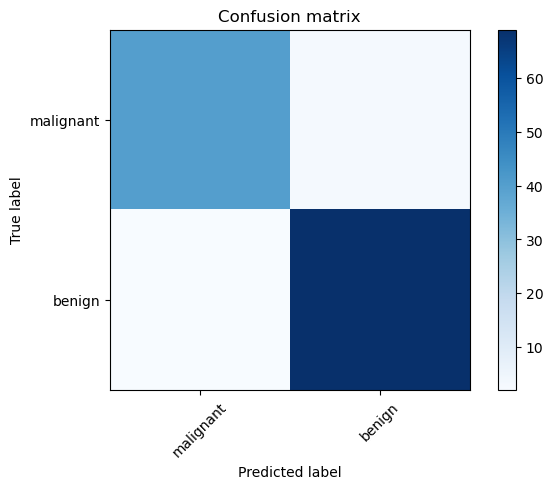

In [84]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(breast_cancer.target_names))
    plt.xticks(tick_marks, breast_cancer.target_names, rotation=45)
    plt.yticks(tick_marks, breast_cancer.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Predict labels for test data
y_pred = logistic_model.predict(X_test_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure()
plot_confusion_matrix(conf_matrix)

# Calculate and display the predictive accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPredictive Accuracy: {accuracy*100:.2f}%")

# Calculate and display classification error
classification_error = 1 - accuracy
print(f"\nClassification Error: {classification_error*100:.2f}%")

# Calculate and display precision, recall, and f-measure
print("\nClassification Report (Precision, Recall, F-measure):")
print(classification_report(y_test, y_pred))

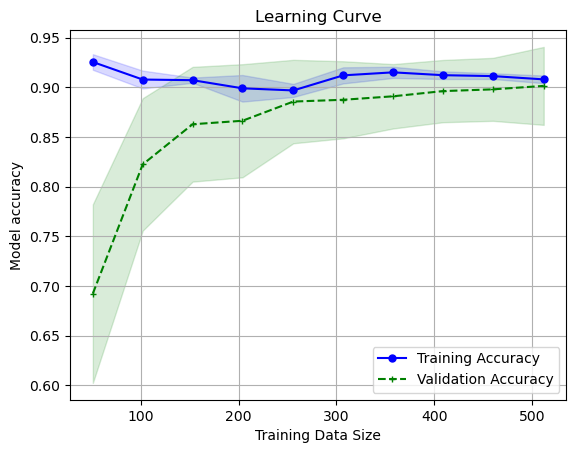

In [85]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(logistic_model, X, y)

Even though the basic logistic model without hyperparameters seem to be a good fit, the model has overfitted as the training accuracy has been consistent and indicates overfitting when the training data size is less than 200

In [86]:
# Get the model coefficients
coefficients = logistic_model.coef_

# For better interpretation, map these coefficients back to the respective feature names
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients.flatten()})

# Sort and display
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                   Feature  Importance
11          symmetry error    1.535232
4            mean symmetry    0.593713
5   mean fractal dimension    0.472672
9        compactness error    0.452137
7            texture error   -0.072397
8         smoothness error   -0.118644
2          mean smoothness   -0.734494
10    concave points error   -0.777809
3         mean compactness   -0.837197
1             mean texture   -1.229981
6             radius error   -1.846235
0              mean radius   -2.437963
12          worst symmetry   -2.584565


In [87]:
pipeline = Pipeline([  
    ('classifier', LogisticRegression())
])

In [88]:
param_grid = [
    {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['newton-cg', 'lbfgs']
    },
    {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    }
]

In [89]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)

In [90]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid=[{'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['newton-cg', 'lbfgs']},
                         {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']}],
             verbose=1)

In [91]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Best Score: 0.9604395604395604


Confusion Matrix:
[[40  3]
 [ 4 67]]

Predictive Accuracy: 93.86%

Classification Error: 6.14%

Classification Report (Precision, Recall, F-measure):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



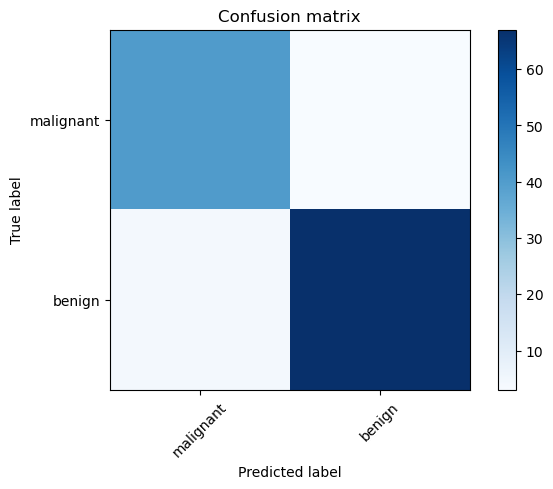

In [92]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(breast_cancer.target_names))
    plt.xticks(tick_marks, breast_cancer.target_names, rotation=45)
    plt.yticks(tick_marks, breast_cancer.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Predict labels for test data
y_pred = grid_search.predict(X_test_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure()
plot_confusion_matrix(conf_matrix)

# Calculate and display the predictive accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPredictive Accuracy: {accuracy*100:.2f}%")

# Calculate and display classification error
classification_error = 1 - accuracy
print(f"\nClassification Error: {classification_error*100:.2f}%")

# Calculate and display precision, recall, and f-measure
print("\nClassification Report (Precision, Recall, F-measure):")
print(classification_report(y_test, y_pred))

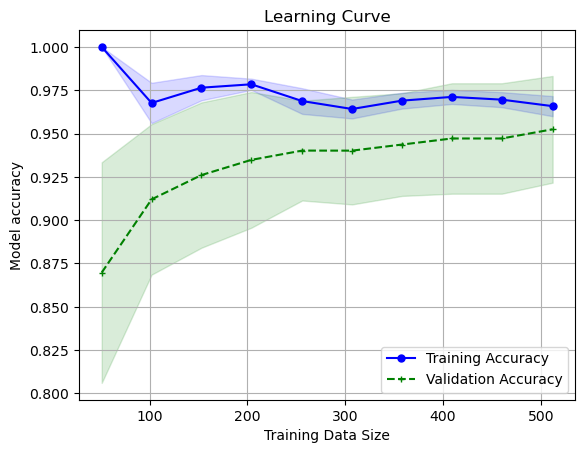

In [67]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(grid_search.best_estimator_, X, y)

The best model has reduced overfitting and the accuracy for both the training and validation has come almost the same to above 0.95

In [73]:
best_model = grid_search.best_estimator_.named_steps['classifier']
coefficients = best_model.coef_

# Check if X is a DataFrame and get column names
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [str(i) for i in range(X.shape[1])]

# For better interpretation, map these coefficients back to the respective feature names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients.flatten()})

# Sort and display
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                   Feature  Importance
11          symmetry error    2.775559
4            mean symmetry    1.574225
9        compactness error    0.821241
5   mean fractal dimension    0.626361
8         smoothness error   -0.351437
7            texture error   -0.406823
3         mean compactness   -0.770594
2          mean smoothness   -1.100690
1             mean texture   -1.588455
10    concave points error   -1.593177
6             radius error   -3.177989
0              mean radius   -3.728392
12          worst symmetry   -4.760527


# K-Nearest Neighbours

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
# Initialize the Logistic Regression model
knn_model = KNeighborsClassifier()

# Fit the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [78]:
# Make predictions on the test data
y_pred = knn_model.predict(X_test_scaled)

Confusion Matrix:
[[38  5]
 [ 2 69]]

Predictive Accuracy: 93.86%

Classification Error: 6.14%

Classification Report (Precision, Recall, F-measure):
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



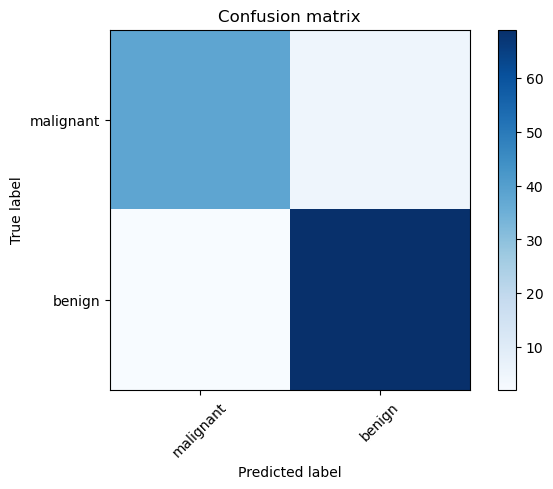

In [79]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(breast_cancer.target_names))
    plt.xticks(tick_marks, breast_cancer.target_names, rotation=45)
    plt.yticks(tick_marks, breast_cancer.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Predict labels for test data
y_pred = knn_model.predict(X_test_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure()
plot_confusion_matrix(conf_matrix)

# Calculate and display the predictive accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPredictive Accuracy: {accuracy*100:.2f}%")

# Calculate and display classification error
classification_error = 1 - accuracy
print(f"\nClassification Error: {classification_error*100:.2f}%")

# Calculate and display precision, recall, and f-measure
print("\nClassification Report (Precision, Recall, F-measure):")
print(classification_report(y_test, y_pred))

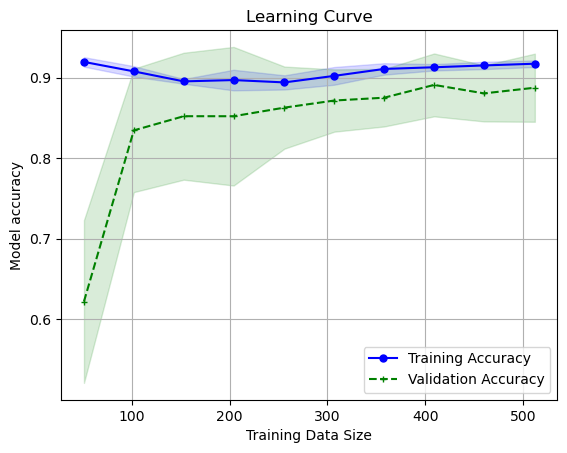

In [80]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(knn_model, X, y)

In [105]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
knn_metric = ["euclidean", "manhattan"]

param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = knn_metric)
#print (param_grid)
#knn = KNeighborsClassifier()

grid = GridSearchCV(knn_model, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [106]:
best_params = grid.best_params_
best_score = grid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


#print("Prediction Accuracy: ",accuracy_score(y_test, grid.predict(X_test_scaled)))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Best Score: 0.9470048309178745


Confusion Matrix:
[[38  5]
 [ 3 68]]

Predictive Accuracy: 92.98%

Classification Error: 7.02%

Classification Report (Precision, Recall, F-measure):
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



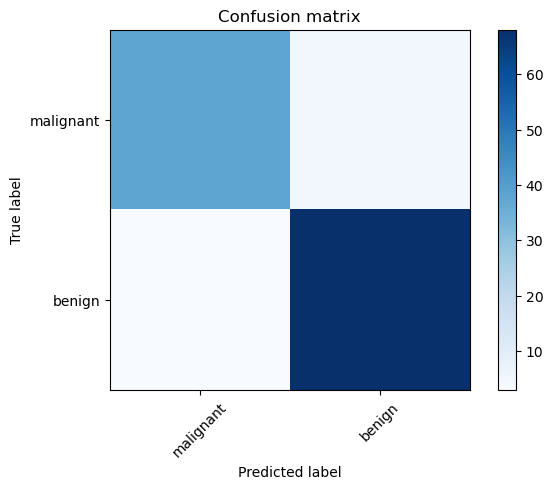

In [107]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(breast_cancer.target_names))
    plt.xticks(tick_marks, breast_cancer.target_names, rotation=45)
    plt.yticks(tick_marks, breast_cancer.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Predict labels for test data
y_pred = grid.predict(X_test_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure()
plot_confusion_matrix(conf_matrix)

# Calculate and display the predictive accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPredictive Accuracy: {accuracy*100:.2f}%")

# Calculate and display classification error
classification_error = 1 - accuracy
print(f"\nClassification Error: {classification_error*100:.2f}%")

# Calculate and display precision, recall, and f-measure
print("\nClassification Report (Precision, Recall, F-measure):")
print(classification_report(y_test, y_pred))

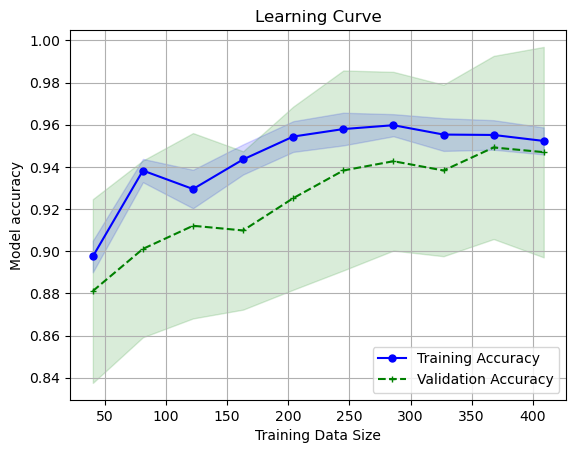

In [109]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(grid.best_estimator_, X_train_scaled, y_train)